<a href="https://colab.research.google.com/github/PrajaktaPatil1/benign_malignant/blob/master/benign_malignant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [ ]:
import os
import zipfile

# Path to the zip file
zip_file_path = '/content/archive (3).zip'

# Directory where you want to extract the files
extracted_dir = '/content/extracted_data'

# Ensure the directory exists
os.makedirs(extracted_dir, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# List the contents of the extracted directory
extracted_files = os.listdir(extracted_dir)
print("Contents of the extracted directory:")
for file_name in extracted_files:
    print(file_name)

# Destination directory to save the extracted files
save_dir = '/content/saved_files'




Contents of the extracted directory:
train
test


In [ ]:
import numpy as np
import os
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

In [ ]:
from skimage.color import rgb2gray

In [ ]:
# Step 1: Load and preprocess images
def load_images(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = imread(os.path.join(folder, filename))
        img = resize(img, (128, 128))  # Resize images to a fixed size
        img_gray = rgb2gray(img)  # Convert color image to grayscale
        images.append(img_gray)
        if "benign" in folder:
            labels.append(0)  # Assuming benign class label is 0
        else:
            labels.append(1)  # Assuming malignant class label is 1
    return np.array(images), np.array(labels)

In [ ]:
# Load images from folders
class_benign_images, class_benign_labels = load_images('/content/extracted_data/train/benign')
class_malignant_images, class_malignant_labels = load_images('/content/extracted_data/train/malignant')

In [ ]:
import numpy as np

In [ ]:
# Concatenate images and labels
images = np.concatenate([class_benign_images, class_malignant_images], axis=0)
labels = np.concatenate([class_benign_labels, class_malignant_labels], axis=0)

In [ ]:
np.unique(labels)

array([0, 1])

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
# Print the shape of each image
for i, image in enumerate(images):
    print(f"Image {i+1}: Shape {image.shape}")

Image 1: Shape (128, 128)
Image 2: Shape (128, 128)
Image 3: Shape (128, 128)
Image 4: Shape (128, 128)
Image 5: Shape (128, 128)
Image 6: Shape (128, 128)
Image 7: Shape (128, 128)
Image 8: Shape (128, 128)
Image 9: Shape (128, 128)
Image 10: Shape (128, 128)
Image 11: Shape (128, 128)
Image 12: Shape (128, 128)
Image 13: Shape (128, 128)
Image 14: Shape (128, 128)
Image 15: Shape (128, 128)
Image 16: Shape (128, 128)
Image 17: Shape (128, 128)
Image 18: Shape (128, 128)
Image 19: Shape (128, 128)
Image 20: Shape (128, 128)
Image 21: Shape (128, 128)
Image 22: Shape (128, 128)
Image 23: Shape (128, 128)
Image 24: Shape (128, 128)
Image 25: Shape (128, 128)
Image 26: Shape (128, 128)
Image 27: Shape (128, 128)
Image 28: Shape (128, 128)
Image 29: Shape (128, 128)
Image 30: Shape (128, 128)
Image 31: Shape (128, 128)
Image 32: Shape (128, 128)
Image 33: Shape (128, 128)
Image 34: Shape (128, 128)
Image 35: Shape (128, 128)
Image 36: Shape (128, 128)
Image 37: Shape (128, 128)
Image 38: 

In [ ]:
from skimage.feature import hog


In [ ]:
# Step 2: Extract features using Histogram of Oriented Gradients (HOG)
hog_features = []
for image in images:
    if image.ndim == 3:
        hog_feature = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False, multichannel=True, channel_axis=-1)
    else:
        hog_feature = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False)
    hog_features.append(hog_feature)
hog_features = np.array(hog_features)

In [ ]:
# Step 3: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

In [ ]:


# Assuming y_train is a numpy array containing the training labels
unique_labels_train = np.unique(y_train)

print("Unique labels in y_train:", unique_labels_train)


Unique labels in y_train: [0 1]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [ ]:
import numpy as np

# Assuming labels is a numpy array containing the labels
unique_labels, label_counts = np.unique(labels, return_counts=True)

print("Label Distribution:")
for label, count in zip(unique_labels, label_counts):
    print("Label:", label, "- Count:", count)

Label Distribution:
Label: 0 - Count: 1352
Label: 1 - Count: 1107


In [ ]:
# Step 2: Train Logistic Regression classifier
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Step 5: Evaluate model
y_pred_lr = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)


Accuracy: 0.6544715447154471


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_pred_lr,y_test)
print(classification_report(y_pred_lr,y_test))

              precision    recall  f1-score   support

           0       0.80      0.64      0.71       331
           1       0.48      0.68      0.56       161

    accuracy                           0.65       492
   macro avg       0.64      0.66      0.64       492
weighted avg       0.70      0.65      0.66       492



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_pred_lr,y_test)

array([[213, 118],
       [ 52, 109]])

Implementing a Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy:", accuracy)


Accuracy: 0.6971544715447154


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np

In [ ]:
accuracy_score(y_pred_rfc,y_test)
print(classification_report(y_pred_rfc,y_test))

              precision    recall  f1-score   support

           0       0.82      0.68      0.74       318
           1       0.56      0.72      0.63       174

    accuracy                           0.70       492
   macro avg       0.69      0.70      0.69       492
weighted avg       0.73      0.70      0.70       492



In [ ]:
confusion_matrix(y_pred_rfc,y_test)

array([[217, 101],
       [ 48, 126]])

Implementing a KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)


Accuracy: 0.6463414634146342


In [ ]:
accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66       253
           1       0.64      0.61      0.63       239

    accuracy                           0.65       492
   macro avg       0.65      0.65      0.65       492
weighted avg       0.65      0.65      0.65       492



In [ ]:
confusion_matrix(y_pred_knn,y_test)

array([[172,  81],
       [ 93, 146]])

Implementing a Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc=DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dtc = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dtc)
print("Accuracy:", accuracy)

Accuracy: 0.5894308943089431


In [ ]:
accuracy_score(y_pred_dtc,y_test)
print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63       281
           1       0.52      0.56      0.54       211

    accuracy                           0.59       492
   macro avg       0.58      0.59      0.58       492
weighted avg       0.59      0.59      0.59       492



In [ ]:
confusion_matrix(y_pred_dtc,y_test)

array([[172, 109],
       [ 93, 118]])

Implementing a Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb=GaussianNB()

In [ ]:
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)

Accuracy: 0.6626016260162602


In [ ]:
accuracy_score(y_pred_nb,y_test)
print(classification_report(y_pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.60      0.73      0.66       217
           1       0.74      0.61      0.67       275

    accuracy                           0.66       492
   macro avg       0.67      0.67      0.66       492
weighted avg       0.68      0.66      0.66       492



In [ ]:
confusion_matrix(y_pred_nb,y_test)

array([[158,  59],
       [107, 168]])

Xgboost

In [ ]:
import xgboost as xgb

In [ ]:
# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

In [ ]:
# Train the classifier
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

Accuracy: 0.7032520325203252


In [ ]:
accuracy_score(y_pred_xgb,y_test)
print(classification_report(y_pred_xgb,y_test))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       299
           1       0.60      0.71      0.65       193

    accuracy                           0.70       492
   macro avg       0.70      0.70      0.70       492
weighted avg       0.72      0.70      0.71       492



extract SURF (Speeded-Up Robust Features) features from image data and apply them to machine learning algorithms

In [ ]:
import cv2
import os

In [ ]:
from skimage.color import rgb2gray

In [ ]:
# Function to load images from a directory
def load_images_from_folder(folder):
    images = []
    for class_folder in os.listdir(folder):
        class_path = os.path.join(folder, class_folder)
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append((img, class_folder))  # Store image and corresponding class label
    return images

In [ ]:
# Load train and test images
train_images = load_images_from_folder('/content/extracted_data/train')
test_images = load_images_from_folder('/content/extracted_data/test')

In [ ]:
# SURF (Speeded-Up Robust Features)
surf = cv2.xfeatures2d.SURF_create()

error: OpenCV(4.8.0) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1026: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


In [ ]:
# ORB (Oriented FAST and Rotated BRIEF)
orb = cv2.ORB_create()
keypoints_orb, descriptors_orb = orb.detectAndCompute(image, None)

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [ ]:
# Create ORB object
orb = cv2.ORB_create()

In [ ]:
# Extract features for train images
train_descriptors = []
train_labels = []
for img, label in train_images:
    keypoints, descriptors = orb.detectAndCompute(img, None)
    train_descriptors.append(descriptors.flatten() if descriptors is not None else [])
    train_labels.append(label)

In [ ]:
# Extract features for test images
test_descriptors = []
test_labels = []
for img, label in test_images:
    keypoints, descriptors = orb.detectAndCompute(img, None)
    test_descriptors.append(descriptors.flatten() if descriptors is not None else [])
    test_labels.append(label)

In [ ]:
# Convert feature vectors and labels to numpy arrays
train_features = np.array(train_descriptors)
test_features = np.array(test_descriptors)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2459,) + inhomogeneous part.

##Deep Learning

#with the CNN

In [ ]:

my_data_dir = '/content/saved_files'

In [ ]:
os.listdir(my_data_dir)

['train', 'test']

In [ ]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [ ]:
os.listdir(test_path)

['malignant', 'benign']

In [ ]:
os.listdir(train_path)

['malignant', 'benign']

In [ ]:
os.listdir(train_path+'benign')[0]

'94.jpg'

In [ ]:
benign = train_path + 'benign/' + '94.jpg'

In [ ]:
benign

'/content/saved_files/train/benign/94.jpg'

array([[[224, 131, 150],
        [224, 131, 150],
        [225, 132, 153],
        ...,
        [228, 137, 152],
        [226, 138, 152],
        [227, 139, 155]],

       [[224, 131, 150],
        [224, 130, 148],
        [226, 129, 148],
        ...,
        [225, 132, 151],
        [223, 132, 149],
        [221, 135, 146]],

       [[228, 136, 151],
        [222, 130, 143],
        [221, 125, 137],
        ...,
        [226, 133, 152],
        [224, 131, 150],
        [223, 130, 149]],

       ...,

       [[207, 126, 132],
        [205, 125, 128],
        [207, 121, 124],
        ...,
        [210, 122, 134],
        [210, 124, 135],
        [208, 127, 136]],

       [[209, 129, 132],
        [207, 128, 131],
        [206, 124, 128],
        ...,
        [204, 123, 129],
        [204, 122, 126],
        [204, 124, 127]],

       [[206, 126, 125],
        [207, 127, 130],
        [206, 126, 129],
        ...,
        [209, 128, 135],
        [204, 122, 128],
        [204, 119, 124]]], dtype=uint8)
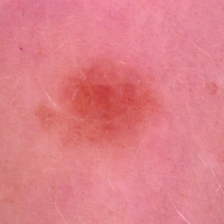

In [ ]:
imread(benign)

In [ ]:
imread(benign).shape

(224, 224, 3)

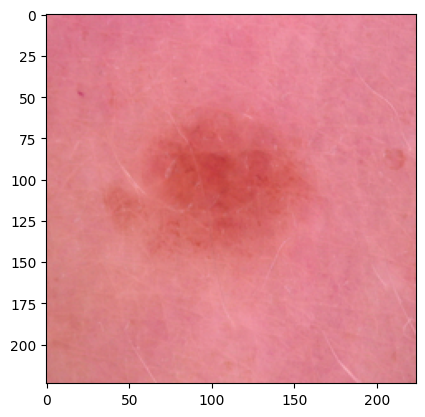

In [ ]:
plt.imshow(imread(benign))

In [ ]:
os.listdir(train_path+'malignant')[0]

'94.jpg'

In [ ]:
malignant = train_path + 'malignant/' + '1381.jpg'

In [ ]:
malignant

'/content/saved_files/train/malignant/1381.jpg'

In [ ]:
imread(malignant).shape

(224, 224, 3)

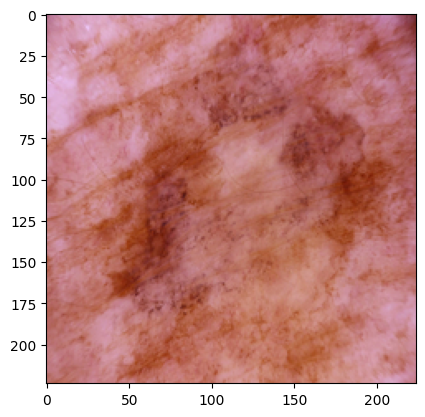

In [ ]:
plt.imshow(imread(malignant))

In [ ]:
len(os.listdir(train_path+'benign'))

1352

In [ ]:
len(os.listdir(train_path+'malignant'))

1107

In [ ]:
len(os.listdir(test_path+'benign'))

174

In [ ]:
len(os.listdir(test_path+'malignant'))

61

In [ ]:
imread(benign).shape

(224, 224, 3)

In [ ]:
imread(malignant).shape

(224, 224, 3)

In [ ]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'malignant'):

    img = imread(test_path+'malignant/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [ ]:
dim1

[224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224]

In [ ]:
dim2

[224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224,
 224]

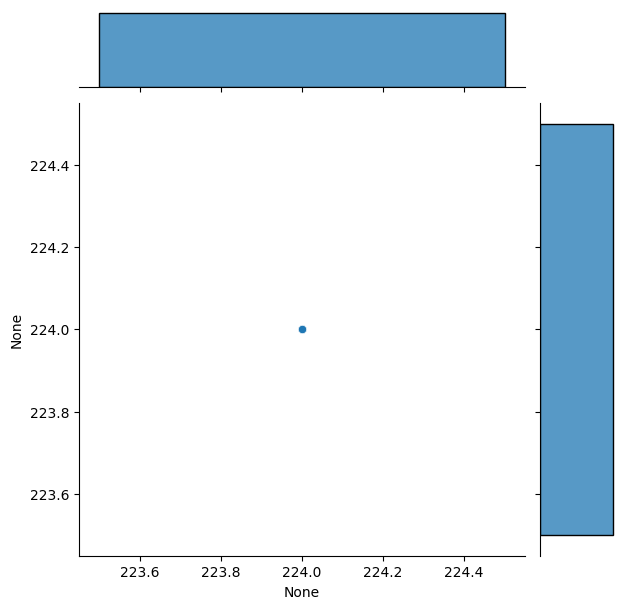

In [ ]:
import seaborn as sns
sns.jointplot(x=dim1, y=dim2)

In [ ]:
np.mean(dim1)

224.0

In [ ]:
np.mean(dim2)

224.0

In [ ]:
image_shape = (224, 224, 3)

In [ ]:
imread(benign).max()

250

In [ ]:
imread(malignant).max()

245

#ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#for training images
train_datagen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest',
                               rescale = 1./255
                              )

#for testing images
test_datagen = ImageDataGenerator(rescale = 1./255)

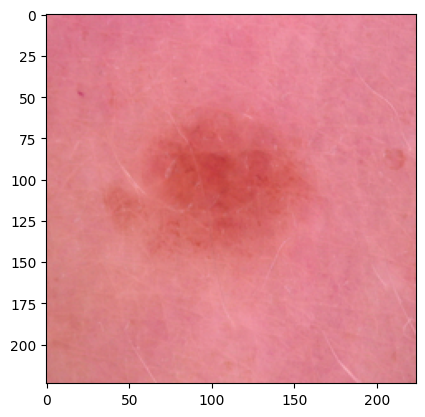

In [ ]:
plt.imshow(imread(benign))

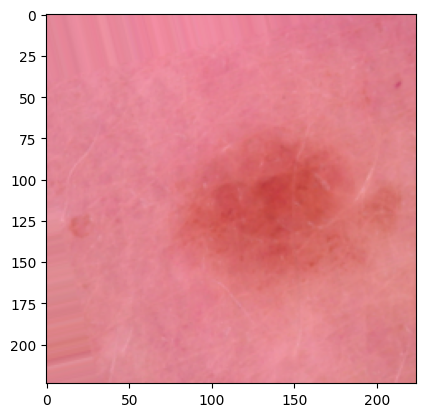

In [ ]:
plt.imshow(train_datagen.random_transform(imread(benign)))

#Creating the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
optimizer = Adam(lr = 0.001)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), input_shape = image_shape, padding = 'Same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'Same',  activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizer ,
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 32)      1

#Early Stopping

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = "val_accuracy", min_delta= 0.00005, patience= 7, verbose= 1, restore_best_weights= True)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.5, patience = 5, min_lr = 1e-7,verbose=1)

#Training the Model

In [ ]:
batch_size = 32

In [ ]:
image_shape[:2]

(224, 224)

In [ ]:
train_image_gen = train_datagen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 2459 images belonging to 2 classes.


In [ ]:
test_image_gen = test_datagen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 235 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'benign': 0, 'malignant': 1}

In [ ]:
model.fit_generator(train_image_gen,epochs=100,
                              validation_data=test_image_gen,
                             callbacks=[early_stop, reduce_lr])

<ipython-input-76-e4c1d7c9c6e0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_image_gen,epochs=100,


Epoch 1/100
77/77 [==============================] - 211s 3s/step - loss: 0.6277 - accuracy: 0.7328 - val_loss: 1.2521 - val_accuracy: 0.7404 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 206s 3s/step - loss: 0.5410 - accuracy: 0.7499 - val_loss: 1.9698 - val_accuracy: 0.7404 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 214s 3s/step - loss: 0.4967 - accuracy: 0.7662 - val_loss: 0.6135 - val_accuracy: 0.7191 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 212s 3s/step - loss: 0.4602 - accuracy: 0.7702 - val_loss: 0.5633 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 207s 3s/step - loss: 0.4541 - accuracy: 0.7837 - val_loss: 0.4099 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 208s 3s/step - loss: 0.4420 - accuracy: 0.7792 - val_loss: 0.5231 - val_accuracy: 0.6936 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 207s 3s/step - lo

#Evaluating the Model

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
model.metrics_names

In [ ]:
model.evaluate_generator(test_image_gen)

In [ ]:
preds = model.predict_generator(test_image_gen)

In [ ]:
preds

In [ ]:
test_image_gen.classes

In [ ]:
# let's assume that > 0.5 belong to malignant and <= 0.5 belong to benign
predictions = preds > 0.5

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

In [ ]:
confusion_matrix(test_image_gen.classes,predictions)

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/skin_cancer_detection.h5')